In [1]:
from tool import YearMonth, yearmonth_range
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from env import ProEvoEnv

import os
import copy
import torch

In [2]:
def epsilon_greedy(q_values, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(len(q_values))
    else:
        return np.argmax(q_values)

In [3]:
input_size_1 = int(1 + 1275 + 35 + 35)
hidden_size_1_1 = int(input_size_1 * 1.2)
hidden_size_1_2 = int(hidden_size_1_1 * 0.8)
hidden_size_1_3 = int(hidden_size_1_2 * 0.5)
output_size_1 = 3
Qmodel_1 = torch.nn.Sequential(
    torch.nn.Linear(input_size_1, hidden_size_1_1),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_1_1, hidden_size_1_2),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_1_2, hidden_size_1_3),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_1_3, output_size_1)
)
loss_fn_1 = torch.nn.MSELoss()
optimizer_1 = torch.optim.Adam(Qmodel_1.parameters(), lr=1e-4)

Qmodel_1_t = copy.deepcopy(Qmodel_1)
Qmodel_1_t.load_state_dict(Qmodel_1.state_dict())


<All keys matched successfully>

In [4]:
input_size_2 = int(1 + 1275 + 35 + 35 + 1)
hidden_size_2_1 = int(input_size_2 * 1.2)
hidden_size_2_2 = int(hidden_size_2_1 * 0.8)
hidden_size_2_3 = int(hidden_size_2_1 * 0.8)
output_size_2 = 1275

Qmodel_2 = torch.nn.Sequential(
    torch.nn.Linear(input_size_2, hidden_size_2_1),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_2_1, hidden_size_2_2),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_2_2, hidden_size_2_3),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_2_3, output_size_2)
)
loss_fn_2 = torch.nn.MSELoss()
optimizer_2 = torch.optim.Adam(Qmodel_2.parameters(), lr=1e-4)

Qmodel_2_t = copy.deepcopy(Qmodel_2)
Qmodel_2_t.load_state_dict(Qmodel_2.state_dict())
    

<All keys matched successfully>

In [5]:
input_size_3 = int(1 + 1275 + 35 + 35 + 1 + 1275)
hidden_size_3_1 = int(input_size_3 * 0.8)
hidden_size_3_2 = int(hidden_size_3_1 * 0.5)
hidden_size_3_3 = int(hidden_size_3_2 * 0.5)
output_size_3 = 20  # 不算空胺基酸

Qmodel_3 = torch.nn.Sequential(
    torch.nn.Linear(input_size_3, hidden_size_3_1),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_3_1, hidden_size_3_2),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_3_2, hidden_size_3_3),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size_3_3, output_size_3)
)
loss_fn_3 = torch.nn.MSELoss()
optimizer_3 = torch.optim.Adam(Qmodel_3.parameters(), lr=1e-4)

Qmodel_3_t = copy.deepcopy(Qmodel_3)
Qmodel_3_t.load_state_dict(Qmodel_3.state_dict())

<All keys matched successfully>

In [6]:
sequence_ref = 'MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT'
dataset = pd.read_csv('data/train_feature_header.csv')
TrainRange = [YearMonth(2019, 12), YearMonth(2021, 6)]

from collections import deque
epochs = 3000
gamma = 0.9
losses = []
mem_size = 1000
batch_size = 200  # 越大浮動越小
replay = deque(maxlen=mem_size)
max_moves = 40
syn_freq_1 = 100
syn_freq_2 = 100
syn_freq_3 = 100
epsilon = 1.

for i in range(epochs):
    env = ProEvoEnv(sequence_ref ,dataset, TrainRange[0], TrainRange[1])
    state = env.state()
    seq = env.sequence_to_index()
    seq_len = len(seq)
    input1_ = np.concatenate([np.array([seq_len]), seq, state])
    input1 = torch.tensor(input1_, dtype=torch.float32)
    
    move = 0
    done = False
    status = 1
    while(status != 0):
        move += 1
        q1 = Qmodel_1(input1)
        q1_ = q1.detach().numpy()
        action1 = epsilon_greedy(q1_, epsilon)
        
        input2_ = np.concatenate([np.array([action1]), input1_])
        input2 = torch.tensor(input2_, dtype=torch.float32)
        q2 = Qmodel_2(input2)
        q2_ = q2.detach().numpy()
        action2 = epsilon_greedy(q2_, epsilon)
        
        input3_ = np.concatenate([q2_, np.array([action1]), input1_])
        input3 = torch.tensor(input3_, dtype=torch.float32)
        q3 = Qmodel_3(input3)
        q3_ = q3.detach().numpy()
        action3 = epsilon_greedy(q3_, epsilon)
        
        env.mutate_sequence(action1, action2, action3)
        reward,ld_min,next = env.get_reward()
        if next:
            done = env.go_next()
            
        
        print(i, move, ld_min, env.ym)
        
        state2 = env.state()
        input1_state2_ = np.concatenate([np.array([seq_len]), seq, state2])
        input1_state2 = torch.tensor(input1_state2_, dtype=torch.float32)
        
        
            
        exp = (input1, input2, input3, action1, action2, action3, reward, input1_state2, done )
        replay.append(exp)
        input1 = input1_state2
        
        if len(replay) > batch_size:
            minibatch = random.sample(replay, batch_size)
            # input1_batch = torch.cat([i1 for (i1,_,_,_,_,_,_,_) in minibatch])
            # action1_batch = torch.tensor([a1 for (_,a1,_,_,_,_,_,_) in minibatch], dtype=torch.int64)
            # action2_batch = torch.tensor([a2 for (_,_,a2,_,_,_,_,_) in minibatch], dtype=torch.int64)
            # action3_batch = torch.tensor([a3 for (_,_,_,a3,_,_,_,_) in minibatch], dtype=torch.int64)
            # reward_batch = torch.tensor([r for (_,_,_,_,r,_,_,_) in minibatch], dtype=torch.float32)
            # input1_state2_batch = torch.cat([i1_s2 for (_,_,_,_,_,i1_s2,_,_) in minibatch])
            # done_batch = torch.tensor([d for (_,_,_,_,_,_,d,_) in minibatch], dtype=torch.bool)
            
            input1_batch = torch.cat([i1.unsqueeze(0) for (i1, _, _, _, _, _, _, _, _) in minibatch])
            input2_batch = torch.cat([i2.unsqueeze(0) for (_, i2, _, _, _, _, _, _, _) in minibatch])
            input3_batch = torch.cat([i3.unsqueeze(0) for (_, _, i3, _, _, _, _, _, _) in minibatch])
            action1_batch = torch.tensor([a1 for (_, _, _, a1, _, _, _, _, _) in minibatch], dtype=torch.int64)
            action2_batch = torch.tensor([a2 for (_, _, _, _, a2, _, _, _, _) in minibatch], dtype=torch.int64)
            action3_batch = torch.tensor([a3 for (_, _, _, _, _, a3, _, _, _) in minibatch], dtype=torch.int64)
            reward_batch = torch.tensor([r for (_, _, _, _, _, _, r, _, _) in minibatch], dtype=torch.float32)
            input1_state2_batch = torch.cat([i1_s2.unsqueeze(0) for (_, _, _, _, _, _, _, i1_s2, _) in minibatch])
            done_batch = torch.tensor([d for (_, _, _, _, _, _, _, _, d) in minibatch], dtype=torch.bool)
            
            
            Q1 = Qmodel_1(input1_batch)
            Q2 = Qmodel_2(input2_batch)
            Q3 = Qmodel_3(input3_batch)
            
            with torch.no_grad():
                Q1_t = Qmodel_1_t(input1_state2_batch)
                a1_state2_batch = torch.argmax(Q1_t, axis=1).unsqueeze(1)
                input2_state2_batch = torch.cat([a1_state2_batch, input1_state2_batch], axis=1)
                Q2_t = Qmodel_2_t(input2_state2_batch)
                a2_state2_batch = torch.argmax(Q2_t, axis=1)
                input3_state2_batch = torch.cat([Q2_t, a1_state2_batch, input1_state2_batch], axis=1)
                Q3_t = Qmodel_3_t(input3_state2_batch)
            
            Y1 = reward_batch + gamma * (~ done_batch) * torch.max(Q1_t, axis=1).values
            Y2 = reward_batch + gamma * (~ done_batch) * torch.max(Q2_t, axis=1).values
            Y3 = reward_batch + gamma * (~ done_batch) * torch.max(Q3_t, axis=1).values
            X1 = Q1.gather(1, action1_batch.unsqueeze(1)).squeeze()
            X2 = Q2.gather(1, action2_batch.unsqueeze(1)).squeeze()
            X3 = Q3.gather(1, action3_batch.unsqueeze(1)).squeeze()
            loss1 = loss_fn_1(X1, Y1.detach())
            loss2 = loss_fn_2(X2, Y2.detach())
            loss3 = loss_fn_3(X3, Y3.detach())
            print('訓練')
            print(i, loss1.item(), loss2.item(), loss3.item())
            optimizer_1.zero_grad()
            loss1.backward()
            optimizer_1.step()
            optimizer_2.zero_grad()
            loss2.backward()
            optimizer_2.step()
            optimizer_3.zero_grad()
            loss3.backward()
            optimizer_3.step()
            losses.append([loss1.item(), loss2.item(), loss3.item()])
            
            if i % syn_freq_1 == 0:
                Qmodel_1_t.load_state_dict(Qmodel_1.state_dict())
            if i % syn_freq_2 == 0:
                Qmodel_2_t.load_state_dict(Qmodel_2.state_dict())
            if i % syn_freq_3 == 0:
                Qmodel_3_t.load_state_dict(Qmodel_3.state_dict())
        
        # 如果有連續3次reward==-3 或者 move > max_moves 則結束
        if reward <= -3:
            status += 1
            if status == 4:
                status = 0
                move = 0
        else:
            status = 1
        
        if done or move > max_moves:
            status = 0
            move = 0
    if epsilon > 0.1:
        epsilon -= 1/epochs
losses = np.array(losses)
            
    
    


0 1 7 201912
0 2 3 201912
0 3 8 201912
0 4 10 201912
0 5 11 201912
1 1 2 202001
1 2 3 202001
1 3 4 202001
1 4 5 202001
1 5 6 202001
1 6 12 202001
1 7 13 202001
2 1 3 201912
2 2 4 201912
2 3 5 201912
2 4 6 201912
2 5 7 201912
2 6 7 201912
3 1 2 202001
3 2 2 202002
3 3 4 202002
3 4 5 202002
3 5 12 202002
3 6 13 202002
3 7 8 202002
4 1 2 202001
4 2 3 202001
4 3 4 202001
4 4 11 202001
4 5 12 202001
4 6 13 202001
5 1 6 201912
5 2 4 201912
5 3 5 201912
5 4 6 201912
5 5 7 201912
5 6 8 201912
6 1 2 202001
6 2 9 202001
6 3 10 202001
6 4 11 202001
7 1 7 201912
7 2 8 201912
7 3 9 201912
8 1 2 202001
8 2 9 202001
8 3 10 202001
8 4 5 202001
8 5 6 202001
8 6 7 202001
8 7 8 202001


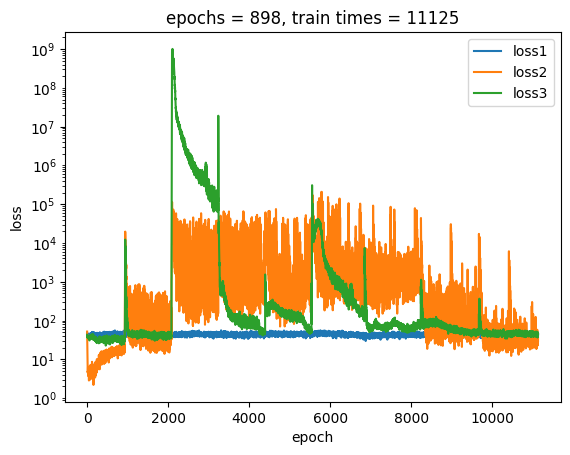

In [ ]:
# 畫loss, 三條畫在一起
from matplotlib.ticker import LogLocator
ll = np.array(losses)
plt.plot(ll[:,0], label='loss1')
plt.plot(ll[:,1], label='loss2')
plt.plot(ll[:,2], label='loss3')
plt.legend()
plt.yscale('log')
# 顯示y軸次刻度 10^x
plt.gca().yaxis.set_minor_locator(LogLocator(base=10.0, subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9), numticks=10))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title(f'epochs = {i}, train times = {len(ll)}')
plt.show()


In [ ]:
# 保存模型
torch.save(Qmodel_1, f'Qmodel_1_{i}.pt')
torch.save(Qmodel_2, f'Qmodel_2_{i}.pt')
torch.save(Qmodel_3, f'Qmodel_3_{i}.pt')
torch.save(Qmodel_1_t, f'Qmodel_1_t_{i}.pt')
torch.save(Qmodel_2_t, f'Qmodel_2_t_{i}.pt')
torch.save(Qmodel_3_t, f'Qmodel_3_t_{i}.pt')

# 儲存losses
np.save('losses.npy', losses)


In [ ]:
epsilon

0.7006666666666996

In [ ]:
amino_acids_dict = {
    'A': 0,  # 丙氨酸
    'R': 1,  # 精氨酸
    'N': 2,  # 天門冬氨酸
    'D': 3,  # 天冬氨酸
    'C': 4,  # 半胱氨酸
    'E': 5,  # 谷氨酸
    'Q': 6,  # 谷氨酰胺
    'G': 7,  # 甘氨酸
    'H': 8,  # 組氨酸
    'I': 9,  # 異亮氨酸
    'L': 10, # 亮氨酸
    'K': 11, # 賴氨酸
    'M': 12, # 蛋氨酸
    'F': 13, # 苯丙氨酸
    'P': 14, # 脯氨酸
    'S': 15, # 絲氨酸
    'T': 16, # 蘇氨酸
    'W': 17, # 色氨酸
    'Y': 18, # 酪氨酸
    'V': 19, # 纈氨酸
    '': 20   # 空白字符
}

In [ ]:
# 用最後一個模型來測試
env = ProEvoEnv(sequence_ref ,dataset, TrainRange[0], TrainRange[1])
state = env.state()
seq = env.sequence_to_index()
seq_len = len(seq)
input1_ = np.concatenate([np.array([seq_len]), seq, state])
input1 = torch.tensor(input1_, dtype=torch.float32)
move = 0
done = False
status = 1

while(status != 0):
    move += 1
    q1 = Qmodel_1(input1)
    q1_ = q1.detach().numpy()
    action1 = epsilon_greedy(q1_, 0)
    
    input2_ = np.concatenate([np.array([action1]), input1_])
    input2 = torch.tensor(input2_, dtype=torch.float32)
    q2 = Qmodel_2(input2)
    q2_ = q2.detach().numpy()
    action2 = epsilon_greedy(q2_, 0)
    
    input3_ = np.concatenate([q2_, np.array([action1]), input1_])
    input3 = torch.tensor(input3_, dtype=torch.float32)
    q3 = Qmodel_3(input3)
    q3_ = q3.detach().numpy()
    action3 = epsilon_greedy(q3_, 0)
    
    env.mutate_sequence(action1, action2, action3)
    reward,ld_min,next = env.get_reward()
    if next:
        done = env.go_next()
    print(f'location: {action2},aminoac: {list(amino_acids_dict.keys())[action3]}')
    print(move, ld_min, env.ym)
    
    state2 = env.state()
    input1_state2_ = np.concatenate([np.array([seq_len]), seq, state2])
    input1_state2 = torch.tensor(input1_state2_, dtype=torch.float32)
    input1 = input1_state2
    
    if reward == -10:
        status += 1
        if status == 4:
            status = 0
            move = 0
    if done or move > max_moves:
        status = 0
        move = 0

location: 12,aminoac: D
1 1 202001
location: 12,aminoac: D
2 1 202002
location: 12,aminoac: D
3 1 202003
location: 12,aminoac: D
4 1 202004
location: 12,aminoac: D
5 1 202005
location: 12,aminoac: D
6 1 202006
location: 12,aminoac: D
7 2 202007
location: 12,aminoac: D
8 2 202008


KeyboardInterrupt: 